# Problem 8.2
Download the image below. Use the basic image processing tools we learned in class to replace the beige and magenta colors with white and save the resulting image. Display the original image and the altered image side by side. (This problem was inspired by Dan White.)


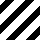
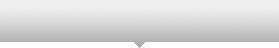
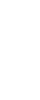
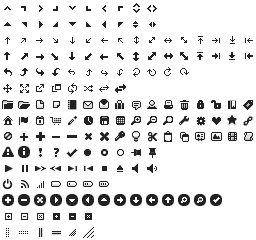
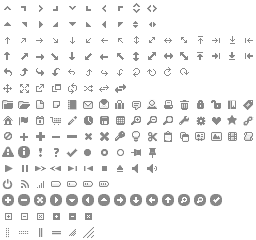
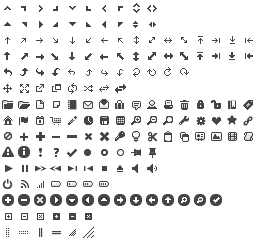
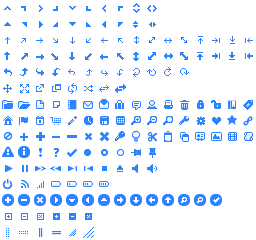
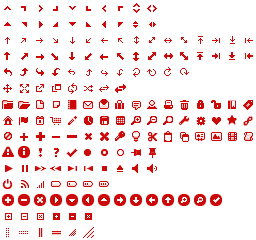
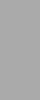
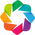
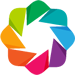
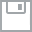
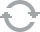
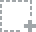
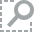
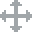
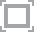
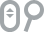

In [34]:
import glob
import os
import warnings

# Our numerical workhorses
import numpy as np
import pandas as pd
import scipy.signal
import scipy.stats as st

# BE/Bi 103 utilities
import sys
sys.path.insert(0, '/Users/chigozie/git/bebi103_utils/')
import bebi103

# Image processing tools
import skimage
import skimage.io

# Import plotting tools
import matplotlib.pyplot as plt
import seaborn as sns

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables high res graphics inline (only use with static plots (non-Bokeh))
# SVG is preferred, but there is a bug in Jupyter with vertical lines
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)

# Import Bokeh modules for interactive plotting
import bokeh.charts
import bokeh.io
import bokeh.plotting

# Display graphics in this notebook
bokeh.io.output_notebook()

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<class 'numpy.ndarray'> uint8 (512, 512, 3)


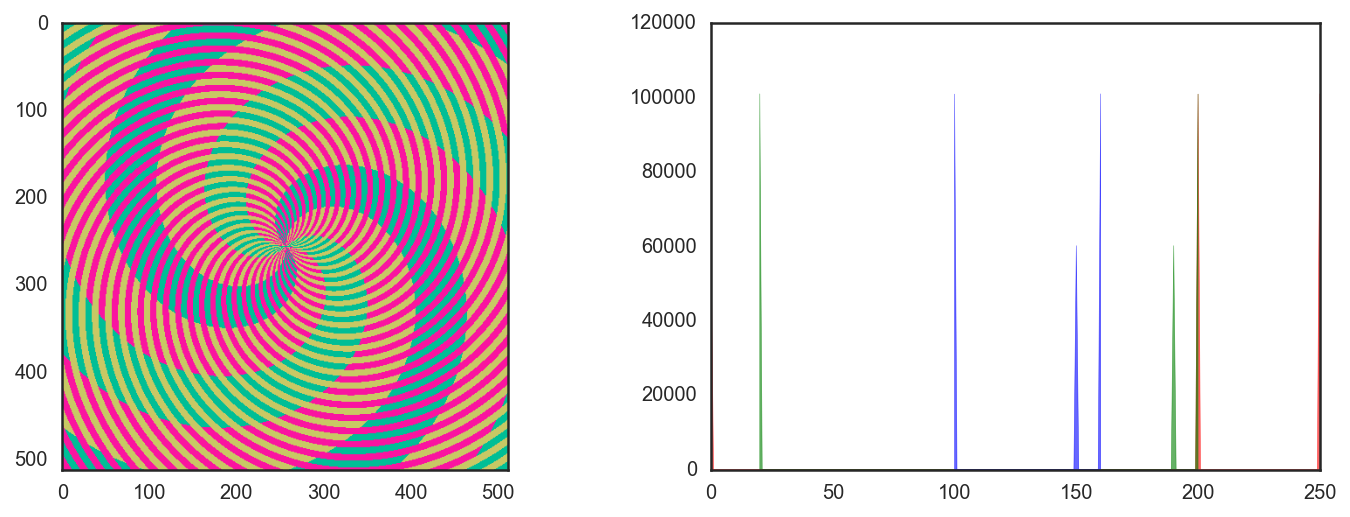

In [79]:
# Load in image
im = skimage.io.imread('../data/swirl.png')
print(type(im), im.dtype, im.shape)

# Get histogram data
hist_r, bins_r = skimage.exposure.histogram(im[:,:,0])
hist_g, bins_g = skimage.exposure.histogram(im[:,:,1])
hist_b, bins_b = skimage.exposure.histogram(im[:,:,2])

with sns.axes_style('white'):
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    ax[0].imshow(im)
    ax[1].fill_between(bins_r, hist_r, color='r', alpha=0.6)
    ax[1].fill_between(bins_g, hist_g, color='g', alpha=0.6)
    ax[1].fill_between(bins_b, hist_b, color='b', alpha=0.6)

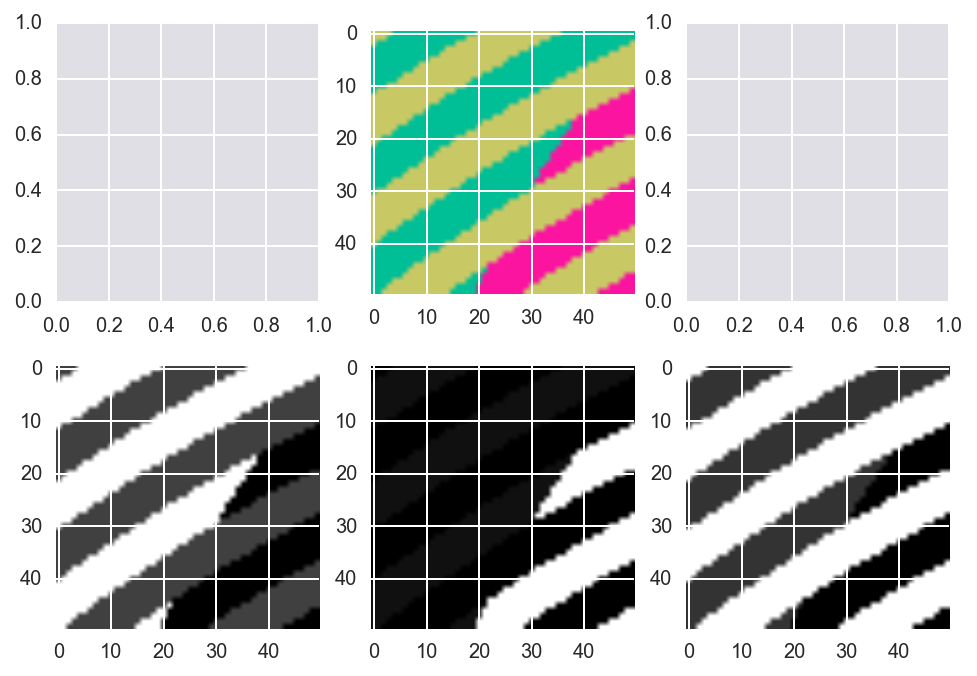

In [63]:
# Plot different channels of small region to try to work out RGB values of beige and magenta
fig, ax = plt.subplots(2,3)
ax[0,1].imshow(im[0:50,0:50,:])
ax[1,0].imshow(im[0:50,0:50,0])
ax[1,1].imshow(im[0:50,0:50,1])
ax[1,2].imshow(im[0:50,0:50,2])

In [89]:
# Pixel [0, 0] is beige, pixel [20, 40] is magenta
print('Beige: %s, Magenta: %s' % (im[0,0,:], im[20,40,:]))

Beige: [200 200 100], Magenta: [250  20 160]


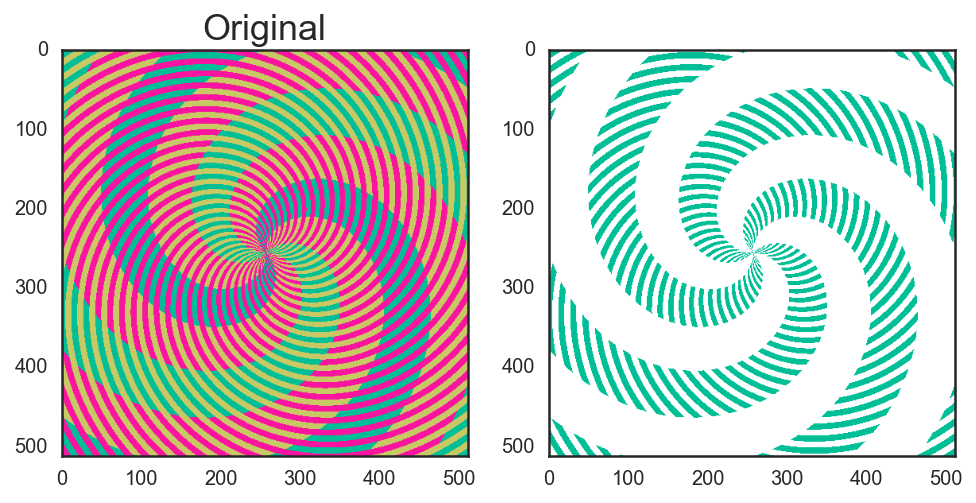

In [85]:
# Copy image to new numpy array
im_nomagenta_beige = np.copy(im)

im_nomagenta_beige[((im_nomagenta_beige[:,:,0]==250) &
             (im_nomagenta_beige[:,:,1]==20) &
             (im_nomagenta_beige[:,:,2]==160)) |
             ((im_nomagenta_beige[:,:,0]==200) &
             (im_nomagenta_beige[:,:,1]==200) &
             (im_nomagenta_beige[:,:,2]==100))] = [255,255,255]
with sns.axes_style('white'):
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(im)
    ax[1].imshow(im_nomagenta_beige)
    ax[0].set_title('Original')
    ax[1].set_title('Altered')

Thus we have shown that the "dark" and "light" green spirals are actually the same colour. We can confirm this:

In [112]:
# Are there any pixels which aren't (0,0,0) or (0,190,150)? Should be False.
(((im_nomagenta_beige[:,:,0]==0) &
(im_nomagenta_beige[:,:,1]==0) &
(im_nomagenta_beige[:,:,0]==0)) |
((im_nomagenta_beige[:,:,0]==0) &
(im_nomagenta_beige[:,:,1]==190) &
(im_nomagenta_beige[:,:,0]==150))).any()


False

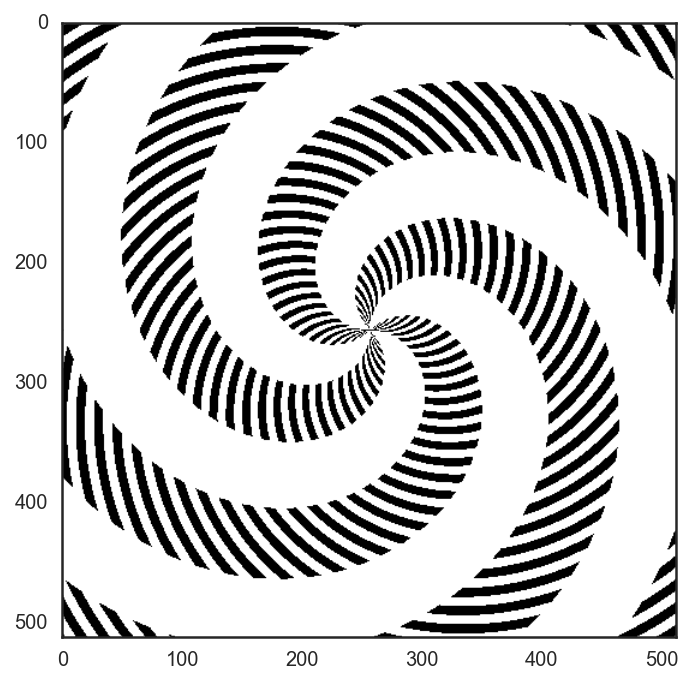

In [113]:
#Or, visually:

im_bw = np.copy(im_nomagenta_beige)

im_bw[(im_bw[:,:,0]==0) & (im_bw[:,:,1]==190) & (im_bw[:,:,2]==150)] = 0

with sns.axes_style('white'):
    plt.imshow(im_bw)

I want to defend my eyes' honour against the slander that they are not as good as my computer. There are ways in which computer vision is better than human vision, but this is not one of them, because
1. My eyes are perfectly capable of identifying that the colours are the same, it's my brain which gets in the way, and
2. The mistake my brain makes actually means my vision is better at most tasks required for vision than the computer is. My brain knows that objects don't magically change colour under different illumination.